<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/17_april_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python classes

## 1 What are classes?

Objects have attributes (data structures) and behaviour (methods = functions)

### 1.1 Create a simple class

We create a class called `Person`
- attribute first name
- attrubute last name

- behaviour tell us the name of the Person

In [2]:
class Person:
  # setting the attributes
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  # implement the behaviour
  def printName(self):
    print(self.firstname, self.lastname)

  

In [3]:
me = Person("Anuj", "Thapa Magar")
me.printName()

Anuj Thapa Magar


### 1.2 Inheritance

We can use a class to "inherit" the attributes and the behaviour from a **parent** class to a **child** class

In [4]:
# just inherit everything without change

class Student(Person):
  pass

newStudent = Student("Qwert", "Yuiop")
newStudent.printName()

Qwert Yuiop


#### 1.2.1 Inherit from parent and add some attribute and new behaviour

In [5]:
class Student(Person):
  # set the new attribute and call the parent initialiser (constructor)
  def __init__(self, fname, lname, year):
    super().__init__(fname, lname)
    self.entryYear = year


  # set the new behaviour
  def welcome(self):
    print(f"Welcome {self.firstname} {self.lastname} to the class of {self.entryYear}.")

In [6]:
newStudent = Student("John", "Doe", 2023)
newStudent.welcome()


Welcome John Doe to the class of 2023.


In [7]:
newStudent.printName()

John Doe


In [8]:
import pandas as pd

df = pd.DataFrame([[1,2],[3,4]], columns=["A","B"])
df

,A,B
0,1,2
1,3,4


In [9]:
df.A.values

array([1, 3])

### 1.3 Chaining -- Use classes to make operations easier to read

In [10]:
# class to add numbers

class Adder:
  def __init__(self,number):
    self.number = number

  # add always two to the number
  def add_two(self):
    self.number += 2
    return self # make chaining possible

  # return the result 
  def result(self):
    return self.number


In [11]:
# Create an instance of the adder object

x = Adder(15)

# now use chaining to create the addition the result
x.add_two().result() 

# Step 1: call add_two from the object x
# Step 2: call result from x
# object x knows from itself because of the keyword "self"

17

In [12]:
Adder(12).add_two().result()

14

#### 1.3.1 Change `add_two` into a property of the class object

For that we can use so called decorators. decorators use the `@` notation.

`@property` to make a method a property that can be udes without @

In [21]:
# class to add numbers

class Adder:
  def __init__(self,number):
    self.number = number

  # add always two to the number
  def add_two(self):
    self.number += 2
    return self # make chaining possible

  # return the result 
  def result(self):
    return self.number

In [22]:
x = Adder(15)
x.add_two.result()

AttributeError: ignored

#### 1.3.2 Create a set decorator

The set decorator os of the form `name.setter`

In [19]:
# class to add numbers

class Adder:
  def __init__(self,number):
    self.number = number
    self.addme = 0

  # add always two to the number
  def add_two(self):
    self.number += 2
    return self # make chaining possible


  # new property add will add the addme attribute to the number attribute 
  @property
  def add(self):
    self.number += self.addme
    return self

  # new add method that allows to set the addme
  @add.setter
  def add(self, addme):
    self.addme = addme
    return self

  
  # return the result 
  def result(self):
    return self.number

In [27]:
x = Adder(15)

# set vua the add setter the number to be added

x.add = 5

# use the add property
x.add.result()

AttributeError: ignored

In [28]:
# Object always allow to set the attribute by just using it as left hand side of the equation

x.addme = 10
x.add.result()

AttributeError: ignored

### 1.4 make a class to create random data


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

class randomData:
  # set attributes to initial values
  def __init__(self):
    self._fct = lambda x, e=0: x
    self._length = 100
    self._seed = 42
    self._df = None
    self._scale = 10

# Method to create the random data
  @property
  def create(self):
    rng = np.random.default_rng(self._seed)
    rng2 = np.random.default_rng(self._seed+1)

  # Create the x,y and epsilon
    x = rng.random(size=self._length)*50
    eps = rng2.normal(loc=0, scale=self._scale, size=len(x))
    y = self._fct(x, e=eps)

    df = pd.DataFrame({
      "x": x,
      "y": y,
      "e": eps
    })

    self._df = df
    return self

  # Return the dataframe after it is created
  @property
  def df(self) -> pd.DataFrame:
    return self._df

  # Method to get the current finction
  @property
  def fct(self) -> pd.DataFrame:
    return self._df

  # Method to set the function
  @fct.setter
  def fct(self, fct):
    self._fct = fct

  # Method to see the state of the class
  def getStateDict(self):
    dc = {
        "function": self._fct,
        "Length": self._length,
        "Seed": self._seed,
        "Scale": self._scale
    }

    return dc

In [45]:
newRandomData = randomData()
newRandomData.getStateDict()

{'function': <function __main__.randomData.__init__.<locals>.<lambda>(x, e=0)>,
 'Length': 100,
 'Seed': 42,
 'Scale': 10}

In [46]:
newRandomData = randomData()
newRandomData.create.df

,x,y,e
0,38.697802,38.697802,2.442295
1,21.943922,21.943922,6.781783
2,42.929896,42.929896,-5.855294
3,34.868401,34.868401,-9.086731
4,4.708867,4.708867,-19.918382
...,...,...,...
95,31.514130,31.514130,-5.622586
96,18.090631,18.090631,0.423771
97,4.382496,4.382496,-23.575166
98,5.900295,5.900295,-5.203630


<Axes: xlabel='x', ylabel='y'>

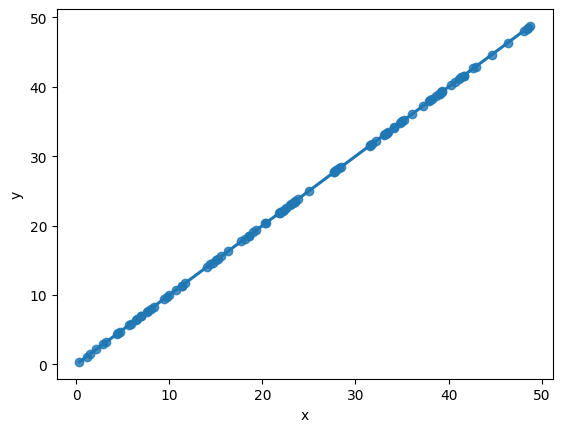

In [42]:
df = newRandomData.create.df

sns.regplot(x="x", y = "y", data = df)

In [47]:
newRandomData.fct = lambda x, m=4, b=20, e= 0: m*x + b + e
newRandomData.getStateDict()

{'function': <function __main__.<lambda>(x, m=4, b=20, e=0)>,
 'Length': 100,
 'Seed': 42,
 'Scale': 10}

In [48]:
newRandomData.create.df

,x,y,e
0,38.697802,177.233505,2.442295
1,21.943922,114.557471,6.781783
2,42.929896,185.864290,-5.855294
3,34.868401,150.386875,-9.086731
4,4.708867,18.917087,-19.918382
...,...,...,...
95,31.514130,140.433932,-5.622586
96,18.090631,92.786293,0.423771
97,4.382496,13.954818,-23.575166
98,5.900295,38.397550,-5.203630


<Axes: xlabel='x', ylabel='y'>

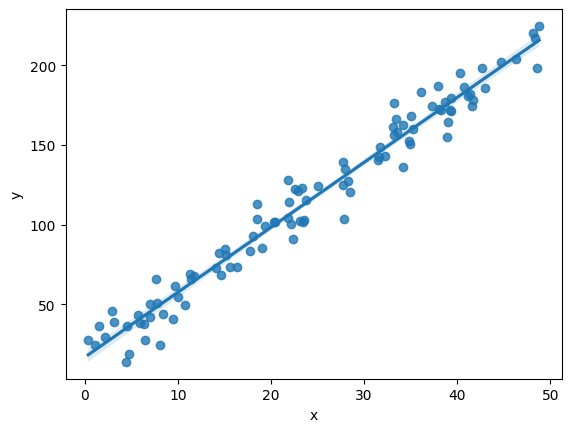

In [49]:
df = newRandomData.create.df

sns.regplot(x="x", y = "y", data = df)